In [ ]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''


In [ ]:
!pip install -U transformers


In [ ]:
!pip install pytesseract opencv-python pillow nltk


In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# **Upload Kaggle.json**

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariyamkhurrum","key":"bd78da8cb233a7d4acefcf8358522ccc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download dataset**

In [ ]:
!kaggle datasets download -d urbikn/sroie-datasetv2


Dataset URL: https://www.kaggle.com/datasets/urbikn/sroie-datasetv2
License(s): other
 98% 815M/834M [00:04<00:00, 203MB/s]
100% 834M/834M [00:04<00:00, 208MB/s]


# **Unzip it**

In [ ]:
!unzip sroie-datasetv2.zip -d sroie_dataset


Archive:  sroie-datasetv2.zip
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/config.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/pytorch_model.bin  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/special_tokens_map.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/tokenizer_config.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/training_args.bin  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/vocab.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X00016469670.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X00016469671.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005200931.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230605.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230616.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230621.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230648.txt  
  inflating: sroie_dataset/SROIE2019/test/box

# **Check the files**

In [ ]:
!ls sroie_dataset


SROIE2019


In [ ]:
!ls sroie_dataset/SROIE2019


layoutlm-base-uncased  test  train


In [ ]:
!ls sroie_dataset/SROIE2019/train | head


box
entities
img


In [ ]:
# List files inside `box/`, `entities/`, and `img/`
!ls sroie_dataset/SROIE2019/train/box | head
!ls sroie_dataset/SROIE2019/train/entities | head
!ls sroie_dataset/SROIE2019/train/img | head


X00016469612.txt
X00016469619.txt
X00016469620.txt
X00016469622.txt
X00016469623.txt
X00016469669.txt
X00016469672.txt
X00016469676.txt
X51005200938.txt
X51005230617.txt
X00016469612.txt
X00016469619.txt
X00016469620.txt
X00016469622.txt
X00016469623.txt
X00016469669.txt
X00016469672.txt
X00016469676.txt
X51005200938.txt
X51005230617.txt
X00016469612.jpg
X00016469619.jpg
X00016469620.jpg
X00016469622.jpg
X00016469623.jpg
X00016469669.jpg
X00016469672.jpg
X00016469676.jpg
X51005200938.jpg
X51005230617.jpg


# **Preview a Sample Receipt + Annotation**

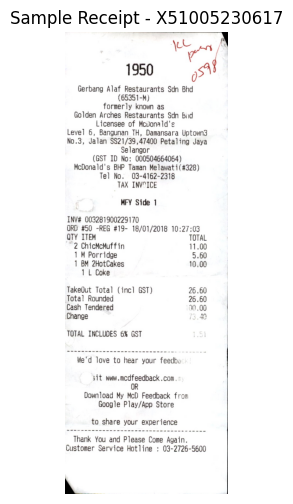

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correct image path
img_path = 'sroie_dataset/SROIE2019/train/img/X51005230617.jpg'

# Read the image
img = cv2.imread(img_path)

# Display if image loaded successfully
if img is not None:
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Sample Receipt - X51005230617")
    plt.axis('off')
    plt.show()
else:
    print("❌ Could not load the image. Check the file path.")


In [ ]:
with open('sroie_dataset/SROIE2019/train/box/X51005230617.txt') as f:
    for i in range(5):
        print(repr(f.readline()))


'223,112,331,112,331,165,223,165,1950\n'
'45,197,477,197,477,224,45,224,GERBANG ALAF RESTAURANTS SDN BHD\n'
'192,229,316,229,316,258,192,258,(65351-M)\n'
'140,261,369,261,369,288,140,288,FORMERLY KNOWN AS\n'
'31,293,478,293,478,320,31,320,GOLDEN ARCHES RESTAURANTS SDN BHD\n'


# **Draw OCR Bounding Boxes with Words on Receipt**

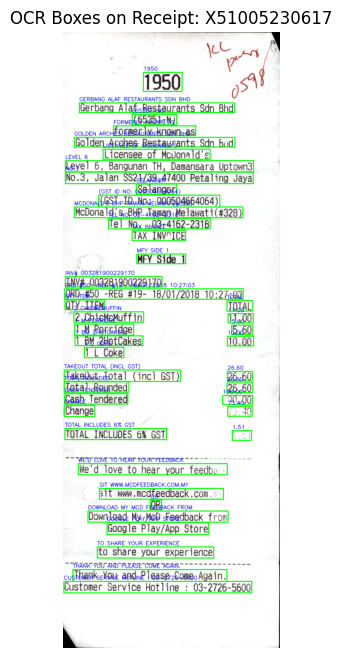

In [ ]:
import cv2
import matplotlib.pyplot as plt

sample_id = 'X51005230617'
img_path = f'sroie_dataset/SROIE2019/train/img/{sample_id}.jpg'
box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'

# Load image
image = cv2.imread(img_path)

if image is None:
    print("❌ Could not load image.")
else:
    with open(box_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 9:
            try:
                # Extract bounding box coordinates (top-left and bottom-right)
                x1 = int(parts[0])
                y1 = int(parts[1])
                x3 = int(parts[4])  # bottom-right x
                y3 = int(parts[5])  # bottom-right y
                word = parts[8].strip()

                # Draw rectangle and word
                cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
                if word:
                    cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                                0.5, (255, 0, 0), 1, cv2.LINE_AA)
            except ValueError:
                continue

    # Convert BGR to RGB and show
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.title(f"OCR Boxes on Receipt: {sample_id}")
    plt.axis('off')
    plt.show()


# **Add Meaning to Each Word**

In [ ]:
# Count OCR words
with open('sroie_dataset/SROIE2019/train/box/X51005230617.txt') as f:
    box_lines = f.readlines()
    print("Words from box file:", len(box_lines))
    print("First 3 box lines:", box_lines[:3])

# Count entity labels
with open('sroie_dataset/SROIE2019/train/entities/X51005230617.txt') as f:
    entity_lines = f.readlines()
    print("Labels from entities file:", len(entity_lines))
    print("First 3 labels:", entity_lines[:3])


Words from box file: 43
First 3 box lines: ['223,112,331,112,331,165,223,165,1950\n', '45,197,477,197,477,224,45,224,GERBANG ALAF RESTAURANTS SDN BHD\n', '192,229,316,229,316,258,192,258,(65351-M)\n']
Labels from entities file: 6
First 3 labels: ['{\n', '    "company": "GERBANG ALAF RESTAURANTS SDN BHD",\n', '    "date": "18/01/2018",\n']


# **Code to Match Entity Fields with OCR**

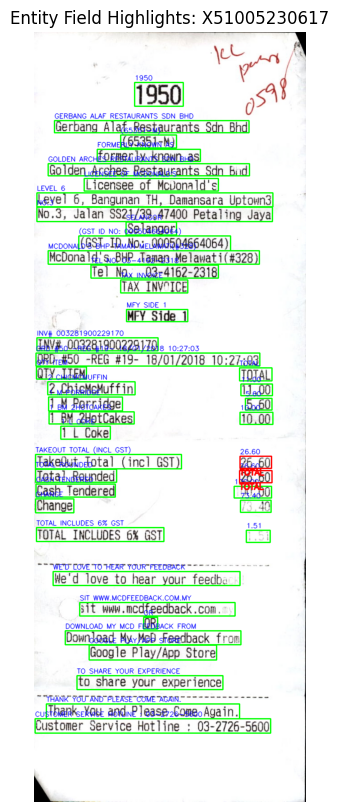

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json

# === File Paths ===
sample_id = 'X51005230617'
img_path = f'sroie_dataset/SROIE2019/train/img/{sample_id}.jpg'
box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

# === Load Image ===
image = cv2.imread(img_path)
if image is None:
    raise Exception("❌ Could not load image.")

# === Load Box + Word Data ===
words, boxes = [], []
with open(box_path, 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        if len(parts) >= 9:
            try:
                x1, y1 = int(parts[0]), int(parts[1])
                x3, y3 = int(parts[4]), int(parts[5])
                word = parts[8].strip()
                boxes.append((x1, y1, x3, y3))
                words.append(word)
            except:
                continue

# === Load Entity Fields as JSON ===
with open(entity_path, 'r') as f:
    entity_json = json.load(f)

# === Draw All Words in Green Boxes (OCR)
for (x1, y1, x3, y3), word in zip(boxes, words):
    cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
    cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (255, 0, 0), 1, cv2.LINE_AA)

# === Highlight Entity Fields in Red
for key, value in entity_json.items():
    value_tokens = value.strip().split()
    value_len = len(value_tokens)

    for i in range(len(words) - value_len + 1):
        window = words[i:i + value_len]
        if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
            # Get combined bounding box of matched tokens
            x1 = min(boxes[i][0], boxes[i + value_len - 1][0])
            y1 = min(boxes[i][1], boxes[i + value_len - 1][1])
            x2 = max(boxes[i][2], boxes[i + value_len - 1][2])
            y2 = max(boxes[i][3], boxes[i + value_len - 1][3])

            # Draw red box and label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(image, key.upper(), (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                        (0, 0, 255), 2, cv2.LINE_AA)

# === Show Image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Entity Field Highlights: {sample_id}")
plt.show()


# **Convert Data to LayoutLM Format**

In [ ]:
import json

def prepare_layoutlm_input(sample_id):
    box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
    entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

    words = []
    boxes = []

    # === Step 1: Read boxes and split multi-word OCR lines ===
    with open(box_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                try:
                    x1, y1 = int(parts[0]), int(parts[1])
                    x2, y2 = int(parts[4]), int(parts[5])
                    raw_text = parts[8].strip()

                    # Split multi-word text into tokens
                    tokens = raw_text.split()
                    for token in tokens:
                        words.append(token)
                        boxes.append([x1, y1, x2, y2])  # Use same box for all split tokens
                except:
                    continue

    # === Step 2: Load entity fields as JSON ===
    with open(entity_path, 'r') as f:
        entity_data = json.load(f)

    labels = ['O'] * len(words)  # Default tag is "O" for all

    # === Step 3: Assign B-/I- tags based on exact match ===
    for key, value in entity_data.items():
        value_tokens = value.strip().split()
        value_len = len(value_tokens)

        for i in range(len(words) - value_len + 1):
            window = words[i:i + value_len]
            if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
                labels[i] = f'B-{key.upper()}'
                for j in range(1, value_len):
                    labels[i + j] = f'I-{key.upper()}'

    # === Step 4: Return in LayoutLM-ready format ===
    layoutlm_data = {
        'id': sample_id,
        'words': words,
        'bboxes': boxes,
        'ner_tags': labels
    }

    return layoutlm_data

# === Test on one sample ===
sample_id = 'X51005230617'
layoutlm_sample = prepare_layoutlm_input(sample_id)

# === Preview the output ===
print(f"Sample ID: {layoutlm_sample['id']}\n")
for w, l in zip(layoutlm_sample['words'], layoutlm_sample['ner_tags']):
    print(f"{w:20} -> {l}")


Sample ID: X51005230617

1950                 -> O
GERBANG              -> B-COMPANY
ALAF                 -> I-COMPANY
RESTAURANTS          -> I-COMPANY
SDN                  -> I-COMPANY
BHD                  -> I-COMPANY
(65351-M)            -> O
FORMERLY             -> O
KNOWN                -> O
AS                   -> O
GOLDEN               -> O
ARCHES               -> O
RESTAURANTS          -> O
SDN                  -> O
BHD                  -> O
LICENSEE             -> O
OF                   -> O
MCDONALD'S           -> O
LEVEL                -> O
6                    -> O
NO.3                 -> O
SELANGOR             -> O
(GST                 -> O
ID                   -> O
NO:                  -> O
000504664064)        -> O
MCDONALD'S           -> O
BHP                  -> O
TAMAN                -> O
MELAWATI(#328)       -> O
TEL                  -> O
NO.                  -> O
03-4162-2318         -> O
TAX                  -> O
INVOICE              -> O
MFY                  -> O

## **Batch Convert All Receipts and Save to JSON**

In [ ]:
import json
import os
from tqdm import tqdm


def prepare_layoutlm_input(sample_id):
    box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
    entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

    words = []
    boxes = []

    # === Step 1: Read boxes and split multi-word OCR lines ===
    with open(box_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                try:
                    x1, y1 = int(parts[0]), int(parts[1])
                    x2, y2 = int(parts[4]), int(parts[5])
                    raw_text = parts[8].strip()

                    # Split multi-word text into tokens
                    tokens = raw_text.split()
                    for token in tokens:
                        words.append(token)
                        boxes.append([x1, y1, x2, y2])  # Use same box for all split tokens
                except:
                    continue


    # === Step 2: Load entity fields as JSON ===
    with open(entity_path, 'r') as f:
        entity_data = json.load(f)

    labels = ['O'] * len(words)  # Default tag is "O" for all

    # === Step 3: Assign B-/I- tags based on exact match ===
    for key, value in entity_data.items():
        value_tokens = value.strip().split()
        value_len = len(value_tokens)

        for i in range(len(words) - value_len + 1):
            window = words[i:i + value_len]
            if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
                labels[i] = f'B-{key.upper()}'
                for j in range(1, value_len):
                    labels[i + j] = f'I-{key.upper()}'

    # === Step 4: Return in LayoutLM-ready format ===
    layoutlm_data = {
        'id': sample_id,
        'words': words,
        'bboxes': boxes,
        'ner_tags': labels
    }

    return layoutlm_data


# === Process all samples ===
box_dir = 'sroie_dataset/SROIE2019/train/box'
sample_ids = [f.split('.')[0] for f in os.listdir(box_dir) if f.endswith('.txt')]

dataset = []

for sample_id in tqdm(sample_ids):
    try:
        record = prepare_layoutlm_input(sample_id)
        dataset.append(record)
    except Exception as e:
        print(f"❌ Error with {sample_id}: {e}")
        continue

# === Save as JSON ===
with open('sroie_layoutlm_dataset.json', 'w') as f:
    json.dump(dataset, f, indent=2)

print(f"\n✅ Dataset saved with {len(dataset)} samples.")

 28%|██▊       | 176/626 [00:00<00:00, 1758.48it/s]

❌ Error with X51005433522: list assignment index out of range


100%|██████████| 626/626 [00:00<00:00, 1758.84it/s]



✅ Dataset saved with 625 samples.


# ***`Step-by-Step LayoutLM Training (NER)`***


In [ ]:
!pip install -q transformers datasets seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


**Load JSON Dataset into HuggingFace Dataset Format**

In [ ]:
from datasets import Dataset, load_metric
import json

# Load JSON
with open("sroie_layoutlm_dataset.json", "r") as f:
    data = json.load(f)

# Convert to HuggingFace Dataset
dataset = Dataset.from_list(data)
dataset = dataset.train_test_split(test_size=0.1)  # 90% train, 10% test

# Show example
dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags'],
        num_rows: 562
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags'],
        num_rows: 63
    })
})

**Label Mapping (NER Tags)**

In [ ]:
# Unique labels
unique_tags = set(tag for sample in dataset['train'] for tag in sample['ner_tags'])
label_list = sorted(list(unique_tags))

label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for label, i in label2id.items()}


In [ ]:
def normalize_bbox(bbox, width, height):
    """Scale coordinates to [0, 1000] range"""
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height))
    ]


In [ ]:
from PIL import Image

def preprocess(example):
    # Get image size
    image_path = f"sroie_dataset/SROIE2019/train/img/{example['id']}.jpg"
    image = Image.open(image_path)
    width, height = image.size

    # Normalize bounding boxes
    norm_bboxes = [normalize_bbox(box, width, height) for box in example['bboxes']]

    # Tokenize
    encoding = tokenizer(
        example['words'],
        truncation=True,
        padding='max_length',
        max_length=512,
        is_split_into_words=True,
        return_offsets_mapping=True
    )

    word_ids = encoding.word_ids()
    labels = []
    for word_idx in word_ids:
        if word_idx is None:
            labels.append(-100)
        else:
            labels.append(label2id[example['ner_tags'][word_idx]])

    encoding['labels'] = labels + [-100] * (512 - len(labels))
    encoding['bbox'] = norm_bboxes + [[0, 0, 0, 0]] * (512 - len(norm_bboxes))

    return encoding


**Preprocess Input for LayoutLM**


In [ ]:
from transformers import LayoutLMTokenizerFast

tokenizer = LayoutLMTokenizerFast.from_pretrained("microsoft/layoutlm-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

**Load LayoutLM Model**

In [ ]:
from transformers import LayoutLMForTokenClassification

model = LayoutLMForTokenClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)
model.to("cuda")


model.safetensors:   0%|          | 0.00/451M [00:00<?, ?B/s]

Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMForTokenClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
 

In [ ]:
encoded_dataset = dataset.map(preprocess)


Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

# Training

In [ ]:
# Ensure consistent label ordering across sessions
labels_sorted = sorted(label2id.keys())
label2id = {lbl: i for i, lbl in enumerate(labels_sorted)}
id2label = {i: lbl for lbl, i in label2id.items()}
num_labels = len(labels_sorted)
print(label2id)


{'B-ADDRESS': 0, 'B-COMPANY': 1, 'B-DATE': 2, 'B-TOTAL': 3, 'I-ADDRESS': 4, 'I-COMPANY': 5, 'I-DATE': 6, 'I-TOTAL': 7, 'O': 8}


In [ ]:
from PIL import Image

def normalize_bbox(bbox, width, height):
    return [
        int(1000 * bbox[0] / width),
        int(1000 * bbox[1] / height),
        int(1000 * bbox[2] / width),
        int(1000 * bbox[3] / height),
    ]

def preprocess_batch(examples):
    batch_encodings = tokenizer(
        examples["words"],
        is_split_into_words=True,
        truncation=True,
        max_length=512,  # LayoutLM max seq length
        return_offsets_mapping=False,
        padding=False,
    )

    all_labels = []
    all_bboxes = []
    for i, example_words in enumerate(examples["words"]):
        sample_id = examples["id"][i]
        w, h = Image.open(f"sroie_dataset/SROIE2019/train/img/{sample_id}.jpg").size
        norm_boxes = [normalize_bbox(bb, w, h) for bb in examples["bboxes"][i]]
        word_ids = batch_encodings.word_ids(batch_index=i)

        # Align labels
        example_labels = examples["ner_tags"][i]
        aligned_labels = []
        aligned_boxes = []
        prev_word = None
        for wid in word_ids:
            if wid is None:
                aligned_labels.append(-100)
                aligned_boxes.append([0,0,0,0])
            else:
                # assign label to first subtoken, and same label to continuation subtokens
                aligned_labels.append(label2id[example_labels[wid]])
                aligned_boxes.append(norm_boxes[wid])
            prev_word = wid
        all_labels.append(aligned_labels)
        all_bboxes.append(aligned_boxes)

    batch_encodings["labels"] = all_labels
    batch_encodings["bbox"] = all_bboxes
    return batch_encodings


In [ ]:
encoded_dataset = dataset.map(
    preprocess_batch,
    batched=True,
    remove_columns=dataset["train"].column_names,  # drop raw cols, keep encodings
)
encoded_dataset


Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'bbox'],
        num_rows: 562
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'bbox'],
        num_rows: 63
    })
})

In [ ]:
import torch
from transformers.tokenization_utils_base import PreTrainedTokenizerBase
from typing import Dict, List, Any, Optional

class DataCollatorForLayoutLMTokenClassification:
    def __init__(self, tokenizer: PreTrainedTokenizerBase, pad_label_id=-100, pad_bbox=[0,0,0,0]):
        self.tokenizer = tokenizer
        self.pad_label_id = pad_label_id
        self.pad_bbox = pad_bbox

    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        # pull sequence lengths
        max_len = max(len(f["input_ids"]) for f in features)
        batch = {
            "input_ids": [],
            "attention_mask": [],
            "token_type_ids": [],
            "bbox": [],
            "labels": [],
        }
        for f in features:
            pad_len = max_len - len(f["input_ids"])
            batch["input_ids"].append(f["input_ids"] + [self.tokenizer.pad_token_id]*pad_len)
            batch["attention_mask"].append(f["attention_mask"] + [0]*pad_len)
            batch["token_type_ids"].append(f.get("token_type_ids", [0]*len(f["input_ids"])) + [0]*pad_len)
            batch["bbox"].append(f["bbox"] + [self.pad_bbox]*pad_len)
            batch["labels"].append(f["labels"] + [self.pad_label_id]*pad_len)
        return {k: torch.tensor(v) for k, v in batch.items()}


In [ ]:
collator = DataCollatorForLayoutLMTokenClassification(tokenizer)


In [ ]:
from transformers import LayoutLMForTokenClassification

model = LayoutLMForTokenClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased",
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
)


Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device


device(type='cuda')

In [ ]:
import numpy as np
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=-1)
    labels = p.label_ids

    true_preds = []
    true_labels = []
    for pred_seq, label_seq in zip(preds, labels):
        pred_labels = []
        label_labels = []
        for p_i, l_i in zip(pred_seq, label_seq):
            if l_i == -100:
                continue
            pred_labels.append(id2label[p_i])
            label_labels.append(id2label[l_i])
        true_preds.append(pred_labels)
        true_labels.append(label_labels)

    return {
        "precision": precision_score(true_labels, true_preds),
        "recall": recall_score(true_labels, true_preds),
        "f1": f1_score(true_labels, true_preds),
    }


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./layoutlm_sroie_ckpt",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    fp16=torch.cuda.is_available(),  # mixed precision if GPU
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    data_collator=collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-37-1532480175.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("./layoutlm_sroie_final")
tokenizer.save_pretrained("./layoutlm_sroie_final")


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: laraib-saleha12 (laraib-saleha12-szabist) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,0.122500,0.072196,0.880123,0.901364,0.890617
2,0.044100,0.061193,0.867257,0.925498,0.895431
3,0.023500,0.062987,0.867761,0.943337,0.903972
4,0.014000,0.072360,0.877571,0.940189,0.907801
5,0.007900,0.075322,0.870441,0.951731,0.909273


('./layoutlm_sroie_final/tokenizer_config.json',
 './layoutlm_sroie_final/special_tokens_map.json',
 './layoutlm_sroie_final/vocab.txt',
 './layoutlm_sroie_final/added_tokens.json',
 './layoutlm_sroie_final/tokenizer.json')

In [ ]:
from PIL import Image

def normalize_bbox(bbox, width, height):
    return [
        int(1000 * bbox[0] / width),
        int(1000 * bbox[1] / height),
        int(1000 * bbox[2] / width),
        int(1000 * bbox[3] / height),
    ]

def preprocess_batch(examples):
    batch_encodings = tokenizer(
        examples["words"],
        is_split_into_words=True,
        truncation=True,
        max_length=512,  # LayoutLM max seq length
        return_offsets_mapping=False,
        padding=False,
    )

    all_labels = []
    all_bboxes = []
    for i, example_words in enumerate(examples["words"]):
        # Assumes images are in a standard location relative to sample_id
        image_path = f"sroie_dataset/SROIE2019/train/img/{examples['id'][i]}.jpg"
        try:
            w, h = Image.open(image_path).size
        except FileNotFoundError:
            print(f"Warning: Image not found for sample ID {examples['id'][i]}. Using dummy size.")
            w, h = 1, 1 # Use dummy size to prevent division by zero

        norm_boxes = [normalize_bbox(bb, w, h) for bb in examples["bboxes"][i]]
        word_ids = batch_encodings.word_ids(batch_index=i)

        # Align labels
        example_labels = examples["ner_tags"][i]
        aligned_labels = []
        aligned_boxes = []
        prev_word = None
        for wid in word_ids:
            if wid is None:
                aligned_labels.append(-100)
                aligned_boxes.append([0,0,0,0])
            else:
                # assign label to first subtoken, and same label to continuation subtokens
                # Ensure wid is within the bounds of example_labels and norm_boxes
                if wid < len(example_labels) and wid < len(norm_boxes):
                    aligned_labels.append(label2id[example_labels[wid]])
                    aligned_boxes.append(norm_boxes[wid])
                else:
                    # Handle cases where word_ids are out of bounds
                    aligned_labels.append(-100)
                    aligned_boxes.append([0,0,0,0])

            prev_word = wid
        all_labels.append(aligned_labels)
        all_bboxes.append(aligned_boxes)

    batch_encodings["labels"] = all_labels
    batch_encodings["bbox"] = all_bboxes
    return batch_encodings

def predict_sample(sample):
    # Prepare input for a single sample
    encoded = preprocess_batch({k: [v] for k, v in sample.items()})

    input_ids = torch.tensor(encoded["input_ids"]).to(device)
    attention_mask = torch.tensor(encoded["attention_mask"]).to(device)
    bbox = torch.tensor(encoded["bbox"]).to(device)
    token_type_ids = torch.tensor(encoded["token_type_ids"]).to(device)

    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            bbox=bbox,
            token_type_ids=token_type_ids,
        )

    logits = outputs.logits[0].cpu().numpy()
    label_ids = logits.argmax(-1)

    # Correct usage: get word_ids from encoded object, not tokenizer
    word_ids = encoded.word_ids(batch_index=0)

    # Collapse subtoken predictions to word-level
    word_level_preds = []
    for idx, wid in enumerate(word_ids):
        if wid is None:
            continue
        if len(word_level_preds) <= wid:
            word_level_preds.append(id2label[label_ids[idx]])

    return list(zip(sample["words"], word_level_preds))

In [ ]:
test_sample = dataset["test"][3]   # or pick an index
pred_pairs = predict_sample(test_sample)
for w, p in pred_pairs:
    print(f"{w:20} -> {p}")

AEON                 -> B-COMPANY
CO.                  -> I-COMPANY
(M)                  -> I-COMPANY
BHD                  -> I-COMPANY
(126926-H)           -> O
3RD                  -> O
FLR                  -> O
JLN                  -> O
JEJAKA               -> O
CHERAS               -> O
GST                  -> O
ID                   -> O
:                    -> O
002017394688         -> O
SHOPPING             -> O
HOURS                -> O
SUN-THU:1000         -> O
HRS                  -> O
-                    -> O
2200                 -> O
HRS                  -> O
FRI-SAT:1000         -> O
HRS                  -> O
-                    -> O
2300                 -> O
HRS                  -> O
VALUED               -> O
CUSTOMER:            -> O
1370001392           -> O
1X                   -> O
000002781709         -> O
15.50SR              -> O
BIO                  -> O
ZIP                  -> O
POWDER               -> O
1X                   -> O
000002781709         -> O
15.50S

In [ ]:
def decode_entities(words, tags):
    fields = {}
    current_field = None
    current_tokens = []
    for w, t in zip(words, tags):
        if t.startswith("B-"):
            # flush previous
            if current_field is not None:
                fields.setdefault(current_field, []).append(" ".join(current_tokens))
            current_field = t[2:]
            current_tokens = [w]
        elif t.startswith("I-") and current_field == t[2:]:
            current_tokens.append(w)
        else:
            # outside or mismatch
            if current_field is not None:
                fields.setdefault(current_field, []).append(" ".join(current_tokens))
            current_field = None
            current_tokens = []
    # flush tail
    if current_field is not None:
        fields.setdefault(current_field, []).append(" ".join(current_tokens))
    # keep longest span per field (common for SROIE)
    return {k: max(v, key=len) for k, v in fields.items()}


In [ ]:
import re

# Allow digits, dots, commas, optional currency symbols
_price_re = re.compile(r"^\$?\d{1,6}([.,]\d{1,2})?$")

def read_ocr_lines(sample_id):
    path = f"sroie_dataset/SROIE2019/train/box/{sample_id}.txt"
    lines = []
    with open(path) as f:
        for ln in f:
            parts = ln.strip().split(',')
            if len(parts) >= 9:
                text = parts[8].strip()
                if text:
                    lines.append(text)
    return lines

def extract_items_prices(sample_id, min_alpha=2):
    items = []
    for line in read_ocr_lines(sample_id):
        toks = line.split()
        if len(toks) < 2:
            continue

        last = toks[-1].replace(":", "").replace(",", "").replace("$", "")

        if _price_re.match(last):  # Last token looks like a price
            item_name = " ".join(toks[:-1]).strip(":-$")
            # Ensure the item name has at least 'min_alpha' letters
            if sum(ch.isalpha() for ch in item_name) >= min_alpha:
                try:
                    price_val = float(last)
                except ValueError:
                    price_val = None
                items.append({
                    "item": item_name,
                    "price_raw": toks[-1],
                    "price": price_val
                })
    return items


In [ ]:
sample_id = test_sample["id"]
extract_items_prices(sample_id)


[{'item': 'ITEM COUNT', 'price_raw': '2', 'price': 2.0}]

In [ ]:
def build_expense_record(sample):
    words, preds = zip(*predict_sample(sample))
    entities = decode_entities(words, preds)
    items = extract_items_prices(sample["id"])
    record = {
        "id": sample["id"],
        "company": entities.get("COMPANY"),
        "date": entities.get("DATE"),
        "address": entities.get("ADDRESS"),
        "total": entities.get("TOTAL"),
        "line_items": items,
    }
    return record

rec = build_expense_record(test_sample)
rec


{'id': 'X51005757235',
 'company': 'AEON CO. (M) BHD',
 'date': '09/03/2018',
 'address': None,
 'total': '31.00',
 'line_items': [{'item': 'ITEM COUNT', 'price_raw': '2', 'price': 2.0}]}

In [ ]:
import pandas as pd

def record_to_df(record):
    # If no line items, create empty DataFrame with correct columns
    if not record.get("line_items"):
        return pd.DataFrame(columns=["item", "price_raw", "price", "receipt_id", "company", "date"])

    df = pd.DataFrame(record["line_items"])
    df["receipt_id"] = record.get("id", "")
    df["company"] = record.get("company", "")
    df["date"] = record.get("date", "")
    return df

record_to_df(rec)


,item,price_raw,price,receipt_id,company,date
0,ITEM COUNT,2,2.0,X51005757235,AEON CO. (M) BHD,09/03/2018


In [ ]:
def build_record(sample):
    sample_id = sample["id"]

    # Step 1: NER Prediction (Company, Date, Total)
    pred_pairs = predict_sample(sample)

    company, date = "", ""
    for word, tag in pred_pairs:
        if tag == "B-COMPANY" or tag == "I-COMPANY":
            company += word + " "
        if tag == "B-DATE" or tag == "I-DATE":
            date += word + " "

    company = company.strip()
    date = date.strip()

    # Step 2: Extract line items (OCR-based)
    line_items = extract_items_prices(sample_id)

    # Build record dict
    record = {
        "id": sample_id,
        "company": company,
        "date": date,
        "line_items": line_items
    }
    return record

# ✅ Test with one sample
test_sample = dataset["test"][2]
rec = build_record(test_sample)
print(rec)

# ✅ Convert to DataFrame
df = record_to_df(rec)
print(df)


{'id': 'X51005719906', 'company': 'ZEN AND COFFEE 28 S/B', 'date': '25 MAR 2018', 'line_items': [{'item': 'NO', 'price_raw': '53', 'price': 53.0}, {'item': 'RECEIPT NO', 'price_raw': '57269', 'price': 57269.0}, {'item': 'PAX', 'price_raw': '2', 'price': 2.0}]}
         item price_raw    price    receipt_id                company  \
0          NO        53     53.0  X51005719906  ZEN AND COFFEE 28 S/B   
1  RECEIPT NO     57269  57269.0  X51005719906  ZEN AND COFFEE 28 S/B   
2         PAX         2      2.0  X51005719906  ZEN AND COFFEE 28 S/B   

          date  
0  25 MAR 2018  
1  25 MAR 2018  
2  25 MAR 2018  


In [ ]:
def extract_items_prices_flexible(sample_id, min_alpha=1):
    items = []
    for line in read_ocr_lines(sample_id):
        toks = line.split()
        if len(toks) < 2:
            continue

        last = toks[-1].replace(":", "").replace(",", "").replace("$", "")

        # If last token is price-like
        if re.match(r"^\d+(\.\d{1,2})?$", last):
            item_name = " ".join(toks[:-1]).strip(":-$")
            if sum(ch.isalpha() for ch in item_name) >= min_alpha:
                try:
                    price_val = float(last)
                except:
                    price_val = None
                items.append({"item": item_name, "price_raw": toks[-1], "price": price_val})

        # If line starts with TOTAL or SUBTOTAL and has price
        elif any(k in line.upper() for k in ["TOTAL", "SUBTOTAL", "AMOUNT"]):
            for token in toks:
                if re.match(r"^\d+(\.\d{1,2})?$", token):
                    items.append({"item": "TOTAL", "price_raw": token, "price": float(token)})
    return items


In [ ]:
test_sample = dataset["test"][2]
rec = build_record(test_sample)  # After replacing extract_items_prices with new one
print(rec)
print(record_to_df(rec))


{'id': 'X51005719906', 'company': 'ZEN AND COFFEE 28 S/B', 'date': '25 MAR 2018', 'line_items': [{'item': 'NO', 'price_raw': '53', 'price': 53.0}, {'item': 'RECEIPT NO', 'price_raw': '57269', 'price': 57269.0}, {'item': 'PAX', 'price_raw': '2', 'price': 2.0}]}
         item price_raw    price    receipt_id                company  \
0          NO        53     53.0  X51005719906  ZEN AND COFFEE 28 S/B   
1  RECEIPT NO     57269  57269.0  X51005719906  ZEN AND COFFEE 28 S/B   
2         PAX         2      2.0  X51005719906  ZEN AND COFFEE 28 S/B   

          date  
0  25 MAR 2018  
1  25 MAR 2018  
2  25 MAR 2018  


In [ ]:
import cv2
import matplotlib.pyplot as plt
import json

def visualize_receipt(sample_id):
    img_path = f"sroie_dataset/SROIE2019/train/img/{sample_id}.jpg"
    box_path = f"sroie_dataset/SROIE2019/train/box/{sample_id}.txt"
    entity_path = f"sroie_dataset/SROIE2019/train/entities/{sample_id}.txt"

    # Load image
    image = cv2.imread(img_path)
    if image is None:
        raise Exception("Image not found:", img_path)

    # Load OCR boxes and text
    words, boxes = [], []
    with open(box_path) as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                x1, y1 = int(parts[0]), int(parts[1])
                x2, y2 = int(parts[4]), int(parts[5])
                text = parts[8].strip()
                words.append(text)
                boxes.append((x1, y1, x2, y2))

    # Load entity info
    with open(entity_path) as f:
        entities = json.load(f)

    # Draw OCR boxes (green)
    for (x1, y1, x2, y2), word in zip(boxes, words):
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Highlight entities (red)
    for key, value in entities.items():
        val_tokens = value.split()
        for i in range(len(words) - len(val_tokens) + 1):
            if [w.lower() for w in words[i:i+len(val_tokens)]] == [v.lower() for v in val_tokens]:
                x1 = min(boxes[i][0], boxes[i+len(val_tokens)-1][0])
                y1 = min(boxes[i][1], boxes[i+len(val_tokens)-1][1])
                x2 = max(boxes[i][2], boxes[i+len(val_tokens)-1][2])
                y2 = max(boxes[i][3], boxes[i+len(val_tokens)-1][3])
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
                cv2.putText(image, key.upper(), (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Show image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"OCR & Entities: {sample_id}")
    plt.show()


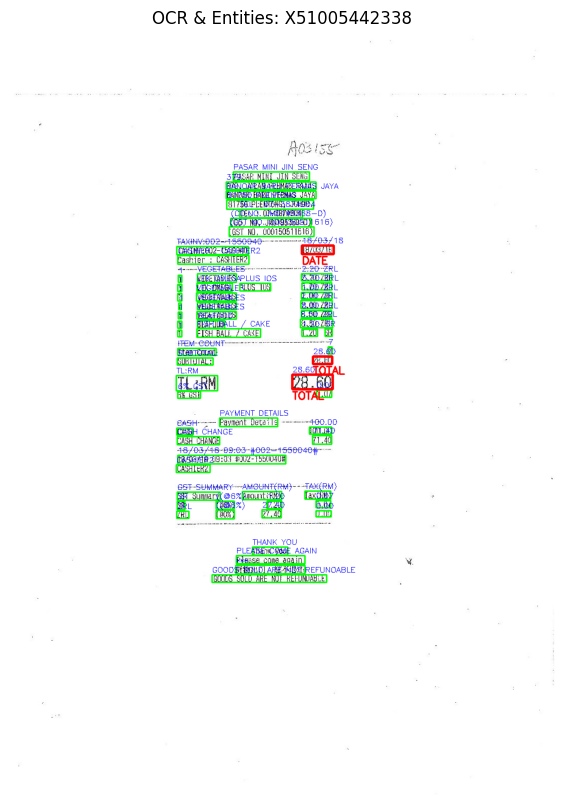

In [ ]:
sample_id = "X51005442338"
visualize_receipt(sample_id)


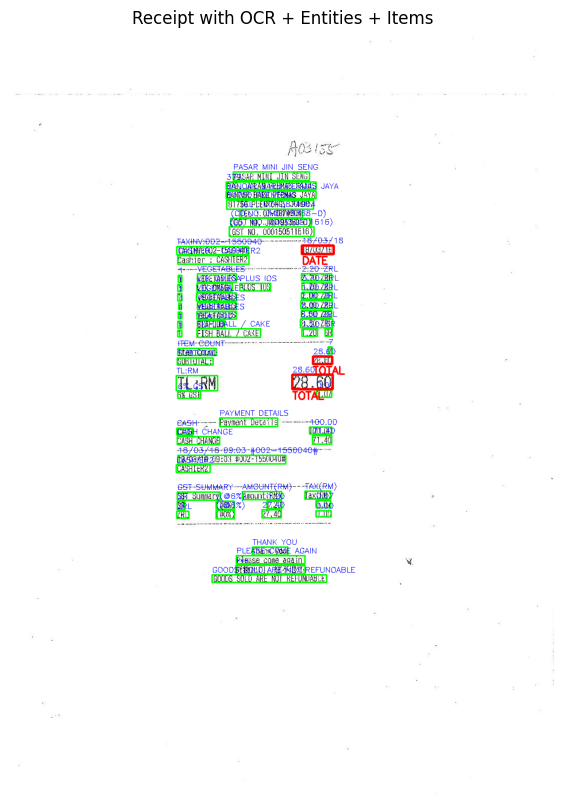

No line items detected.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import json
import pandas as pd
import re

# --- Price Pattern ---
_price_re = re.compile(r"^\$?\d+(\.\d{1,2})?$")

# --- OCR Reader ---
def read_ocr_lines(sample_id=None, image_path=None, box_path=None):
    lines = []
    if sample_id:
        box_path = f"sroie_dataset/SROIE2019/train/box/{sample_id}.txt"
    if not box_path:
        raise ValueError("Provide either sample_id or box_path")

    with open(box_path) as f:
        for ln in f:
            parts = ln.strip().split(',')
            if len(parts) >= 9:
                text = parts[8].strip()
                if text:
                    lines.append(text)
    return lines

# --- Extract Items & Prices ---
def extract_items_prices(sample_id=None, box_path=None, min_alpha=2):
    if sample_id:
        box_path = f"sroie_dataset/SROIE2019/train/box/{sample_id}.txt"

    items = []
    with open(box_path) as f:
        for ln in f:
            parts = ln.strip().split(',')
            if len(parts) >= 9:
                text = parts[8].strip()
                toks = text.split()
                if len(toks) < 2:
                    continue
                last = toks[-1].replace(":", "").replace(",", "").replace("$", "")
                if _price_re.match(last):
                    item_name = " ".join(toks[:-1]).strip(":-$")
                    if sum(ch.isalpha() for ch in item_name) >= min_alpha:
                        try:
                            price_val = float(last)
                        except:
                            price_val = None
                        items.append({"item": item_name, "price_raw": toks[-1], "price": price_val})
    return items

# --- Visualization & Extraction ---
def visualize_and_extract(sample_id=None, image_path=None, box_path=None, entity_path=None):
    # Paths
    if sample_id:
        image_path = f"sroie_dataset/SROIE2019/train/img/{sample_id}.jpg"
        box_path = f"sroie_dataset/SROIE2019/train/box/{sample_id}.txt"
        entity_path = f"sroie_dataset/SROIE2019/train/entities/{sample_id}.txt"

    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise Exception(f"Image not found: {image_path}")

    # Load OCR boxes
    words, boxes = [], []
    with open(box_path) as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                x1, y1 = int(parts[0]), int(parts[1])
                x2, y2 = int(parts[4]), int(parts[5])
                text = parts[8].strip()
                if text:
                    words.append(text)
                    boxes.append((x1, y1, x2, y2))

    # Load entities if available
    entities = {}
    if entity_path:
        with open(entity_path) as f:
            entities = json.load(f)

    # Draw OCR boxes (green)
    for (x1, y1, x2, y2), word in zip(boxes, words):
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Highlight entities (red)
    for key, value in entities.items():
        val_tokens = value.split()
        for i in range(len(words) - len(val_tokens) + 1):
            if [w.lower() for w in words[i:i+len(val_tokens)]] == [v.lower() for v in val_tokens]:
                x1 = min(boxes[i][0], boxes[i+len(val_tokens)-1][0])
                y1 = min(boxes[i][1], boxes[i+len(val_tokens)-1][1])
                x2 = max(boxes[i][2], boxes[i+len(val_tokens)-1][2])
                y2 = max(boxes[i][3], boxes[i+len(val_tokens)-1][3])
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
                cv2.putText(image, key.upper(), (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Extract line items (blue)
    line_items = extract_items_prices(sample_id=sample_id, box_path=box_path)
    for li in line_items:
        for (x1, y1, x2, y2), word in zip(boxes, words):
            if li["item"].split()[0].lower() in word.lower():
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Receipt with OCR + Entities + Items")
    plt.show()

    # Print extracted items in table
    if line_items:
        df = pd.DataFrame(line_items)
        display(df)
    else:
        print("No line items detected.")

# ✅ Test on SROIE sample
visualize_and_extract(sample_id="X51005442338")


In [ ]:
lines = read_ocr_lines(sample_id="X51005442338")
for line in lines:
    print(line)


PASAR MINI JIN SENG
379
BANOAR BARU PERMAS JAYA
81750 PLENTONG
TEL : 07-3874904
(CO.NO. JM0195368-D)
(GST NO. 000150511616)
TAXINV:002-1550040
18/03/18
CASHIER : CASHTER2
1
VEGETABLES
2.20 ZRL
1
LTK OMEGA
5.70 ZRL
1
VEGETABLES
1.00 ZRL
1
VEGETABLES
2.00 ZRL
1
VEGETABLES
8.00 ZRL
1
SEAFOOD
8.50 ZRL
1
FISH BALL / CAKE
1.20
SR
ITEM COUNT
7
SUBTOTAL:
28.60
TL:RM
28.60
6% GST
0.07
PAYMENT DETAILS
CASH
100.00
CASH CHANGE
71.40
18/03/18 09:03 #002-1550040#
CASHIER2
GST SUMMARY
AMOUNT(RM)
TAX(RM)
SR
((@6%)
1.20
0.07
ZRL
((@6%)
27.40
0.00
THANK YOU
PLEASE COME AGAIN
***
GOODS SOLD ARE NOT REFUNOABLE
PLUS IOS


FileUpload(value={}, accept='image/*', description='Upload')

Processing file: X51005200931.jpg


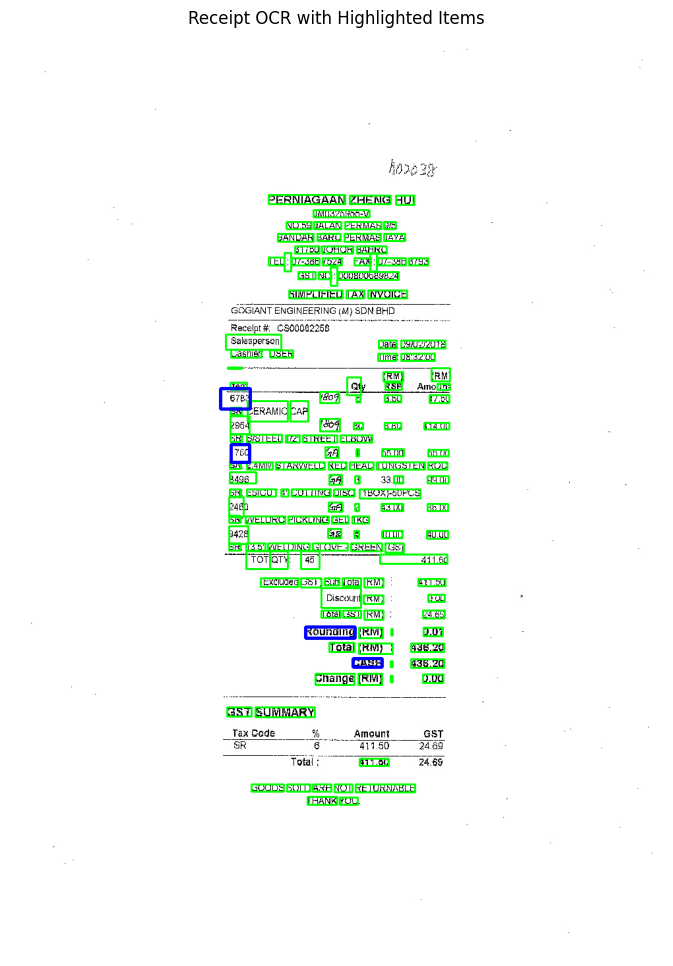

,item,price_raw,price
0,“eres Woy 5,380,380.00
1,1760 GA 4 85.00,6.00,6.00
2,Rounding (RM) +,0.07,0.07
3,GASH,436.20,436.20


In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pytesseract
import re
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from io import BytesIO

# Regex to detect price-like tokens
_price_re = re.compile(r"^\$?\d+(\.\d{1,2})?$")

def extract_items_prices_from_ocr_lines(lines, min_alpha=2, max_price=1000):
    items = []
    exclude_keywords = [
        'ref', 'terminal', 'city', 'invoice', 'tax', 'gst', 'subtotal', 'payment', 'change',
        'cash', 'balance', 'amount', 'due', 'refund', 'count', 'thank', 'please', 'come', 'again',
        'goods', 'sold', 'not', 'refundable', 'item', 'total'
    ]

    for line in lines:
        line_lower = line.lower()
        # skip lines with any exclude keywords
        if any(k in line_lower for k in exclude_keywords):
            continue

        toks = line.split()
        if len(toks) < 2:
            continue

        price_candidate = None
        price_raw = None

        last_tok = toks[-1].replace(",", "").replace(":", "").replace("$", "")
        if _price_re.match(last_tok):
            price_candidate = last_tok
            price_raw = toks[-1]
            item_name_tokens = toks[:-1]
        else:
            second_last_tok = toks[-2].replace(",", "").replace(":", "").replace("$", "") if len(toks) >= 3 else None
            last_tok_alpha = toks[-1].isalpha()
            if second_last_tok and _price_re.match(second_last_tok) and last_tok_alpha:
                price_candidate = second_last_tok
                price_raw = toks[-2]
                item_name_tokens = toks[:-2]
            else:
                continue

        item_name = " ".join(item_name_tokens).strip(":-$")

        # Check for enough alphabetic characters in item name
        if sum(ch.isalpha() for ch in item_name) < min_alpha:
            continue

        try:
            price_val = float(price_candidate)
        except:
            price_val = None

        # Filter out weird prices: zero or suspiciously large
        if price_val is None or price_val <= 0 or price_val > max_price:
            continue

        # Also skip if item name looks like mostly numbers (e.g. barcodes)
        if all(ch.isdigit() or ch in ' -.' for ch in item_name):
            continue

        items.append({"item": item_name, "price_raw": price_raw, "price": price_val})

    return items


def process_image_and_extract_items(file_bytes):
    # Convert bytes to numpy array for OpenCV
    npimg = np.frombuffer(file_bytes, np.uint8)
    img = cv2.imdecode(npimg, cv2.IMREAD_COLOR)

    if img is None:
        print("❌ Failed to load image")
        return

    # OCR using pytesseract (word-level)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ocr_result = pytesseract.image_to_string(img_rgb)

    # Split OCR text into lines
    lines = [line.strip() for line in ocr_result.split('\n') if line.strip()]

    # Extract items and prices
    extracted_items = extract_items_prices_from_ocr_lines(lines)

    # Visualization: draw bounding boxes on detected words
    data = pytesseract.image_to_data(img_rgb, output_type=pytesseract.Output.DICT)
    n_boxes = len(data['level'])
    for i in range(n_boxes):
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        text = data['text'][i].strip()
        if text:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Highlight extracted item names (blue boxes)
    for item in extracted_items:
        first_word = item['item'].split()[0].lower()
        for i in range(n_boxes):
            word = data['text'][i].strip().lower()
            if first_word in word and word != '':
                (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)

    # Show image with boxes
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14, 12))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Receipt OCR with Highlighted Items")
    plt.show()

    # Show extracted items in table
    if extracted_items:
        df = pd.DataFrame(extracted_items)
        display(df)
    else:
        print("No line items detected.")

# Create file upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload_widget.value:
        # Grab uploaded file content
        file_info = next(iter(upload_widget.value.values()))
        file_bytes = file_info['content']
        print(f"Processing file: {file_info['metadata']['name']}")
        process_image_and_extract_items(file_bytes)

upload_widget.observe(on_upload_change, names='value')
display(upload_widget)


In [ ]:
!pip install gradio pytesseract opencv-python --quiet

import cv2
import pytesseract
import pandas as pd
import re
import gradio as gr

# --- Price Pattern ---
_price_re = re.compile(r"^\$?\d+(\.\d{1,2})?$")

def extract_items_from_image(image):
    # Convert PIL to OpenCV
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # OCR
    ocr_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    lines_dict = {}
    line_threshold = 12

    for i in range(len(ocr_data['text'])):
        text = ocr_data['text'][i].strip()
        if not text:
            continue
        y = ocr_data['top'][i]
        line_key = None
        for key in lines_dict.keys():
            if abs(key - y) < line_threshold:
                line_key = key
                break
        if line_key is None:
            line_key = y
            lines_dict[line_key] = []
        lines_dict[line_key].append(text)

    # Rebuild lines
    lines = [" ".join(lines_dict[k]) for k in sorted(lines_dict.keys())]

    # Extract item-price pairs
    items = []
    for line in lines:
        tokens = line.split()
        if len(tokens) < 2:
            continue
        last = tokens[-1].replace("$", "").replace(",", "")
        if _price_re.match(last):
            item_name = " ".join(tokens[:-1])
            if sum(ch.isalpha() for ch in item_name) >= 2:
                try:
                    price_val = float(last)
                except:
                    price_val = None
                items.append([item_name, tokens[-1], price_val])

    if not items:
        return "No line items detected."

    df = pd.DataFrame(items, columns=["Item", "Price Raw", "Price"])
    return df

import numpy as np
# Launch Gradio UI
demo = gr.Interface(
    fn=extract_items_from_image,
    inputs=gr.Image(type="pil", label="Upload Receipt"),
    outputs="dataframe",
    title="Receipt OCR Extractor",
    description="Upload a receipt image to extract purchased items and their prices."
)

demo.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://80e1bde15c612e504d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^